# Car Evaluation Dataset

The dataset can be found [here](https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set).

The dataset contains the following attributes:
1. Buying: v-high, high, med, low
2. Maintenance: v-high, high, med, low
3. Doors: 2, 3, 4, 5more
4. Persons: 2, 4, more
5. Lug_boot: small, med, big
6. Safety: low, med, high
7. Class: unacc, acc, good, v-good

The Car Evaluation Database contains examples with the structural
information removed, i.e., directly relates CAR to the six input
attributes: buying, maint, doors, persons, lug_boot, safety.

Given the specifics of the car, we classify whether the condition of the car is acceptable, unaccepable, good or very good.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Import the dataset:

In [2]:
data = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Machine Learning/Data Training/Car Evaluation/car_evaluation.csv', 
                   header=None)
data.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


Rename the columns:

In [3]:
data.columns = ['Buying', 'Maintenance', 'Doors', 'Persons', 'Lug_Boot', 'Safety', 'Class']
data.head()

,Buying,Maintenance,Doors,Persons,Lug_Boot,Safety,Class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Buying       1728 non-null   object
 1   Maintenance  1728 non-null   object
 2   Doors        1728 non-null   object
 3   Persons      1728 non-null   object
 4   Lug_Boot     1728 non-null   object
 5   Safety       1728 non-null   object
 6   Class        1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


There are no missing values. Get some descriptions of the dataset:

In [5]:
data.describe(include='all')

,Buying,Maintenance,Doors,Persons,Lug_Boot,Safety,Class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


The data is of type object. There are four unique values for four columns, namely Buying, Maintenance, Doors and Class. The remaining columns have three unique values. We can check what those values are:

In [6]:
print('Unique values - Buying: ', data['Buying'].unique())
print('Unique values - Maintenance: ', data['Maintenance'].unique())
print('Unique values - Doors: ', data['Doors'].unique())
print('Unique values - Persons: ', data['Persons'].unique())
print('Unique values - Lug_Boot: ', data['Lug_Boot'].unique())
print('Unique values - Safety: ', data['Safety'].unique())
print('Unique values - Class: ', data['Class'].unique())

Unique values - Buying:  ['vhigh' 'high' 'med' 'low']
Unique values - Maintenance:  ['vhigh' 'high' 'med' 'low']
Unique values - Doors:  ['2' '3' '4' '5more']
Unique values - Persons:  ['2' '4' 'more']
Unique values - Lug_Boot:  ['small' 'med' 'big']
Unique values - Safety:  ['low' 'med' 'high']
Unique values - Class:  ['unacc' 'acc' 'vgood' 'good']


We can use a Label Encoder to encode the categorical variables, since they are mostly ordinal in nature.

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [8]:
for columns in data.columns.values:
  data[columns] = encoder.fit_transform(data[columns])
data.head()

,Buying,Maintenance,Doors,Persons,Lug_Boot,Safety,Class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


Check the data type of the columns again:

In [9]:
data.dtypes

Buying         int64
Maintenance    int64
Doors          int64
Persons        int64
Lug_Boot       int64
Safety         int64
Class          int64
dtype: object

Split the data into features and target:

In [10]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [11]:
data['Class'].value_counts()

2    1210
0     384
1      69
3      65
Name: Class, dtype: int64

The target data is imbalanced. We have to balance the class using sampling techniques. We can check the performance before and after performing the balancing of the target class.

Split the data into training and testing sets:

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size = 0.2)
print('x_train shape: ', x_train.shape)
print('x_test shape: ', x_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (1382, 6)
x_test shape:  (346, 6)
y_train shape:  (1382,)
y_test shape:  (346,)


In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

## Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier
DT_classifier = DecisionTreeClassifier(criterion='entropy')
DT_classifier.fit(x_train, y_train)
y_pred_DT = DT_classifier.predict(x_test)

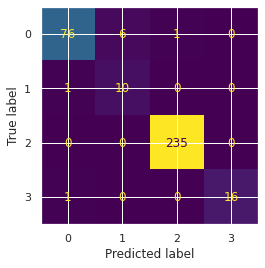

In [15]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_DT, colorbar=False)

In [16]:
y_train_pred_DT = DT_classifier.predict(x_train)
print('Accuracy of train data: ', accuracy_score(y_train, y_train_pred_DT))
print('Accuracy of test data: ', accuracy_score(y_test, y_pred_DT))

Accuracy of train data:  1.0
Accuracy of test data:  0.9739884393063584


In [17]:
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94        83
           1       0.62      0.91      0.74        11
           2       1.00      1.00      1.00       235
           3       1.00      0.94      0.97        17

    accuracy                           0.97       346
   macro avg       0.90      0.94      0.91       346
weighted avg       0.98      0.97      0.98       346



We cannot say for sure that there is any overfitting problem, since the testing accuracy and training accuracy are almost similar.

Let us try to check the accuracy using Gini Entropy:

In [18]:
from sklearn.tree import DecisionTreeClassifier
DT_classifier_Gini = DecisionTreeClassifier()
DT_classifier_Gini.fit(x_train, y_train)
y_pred_Gini = DT_classifier.predict(x_test)

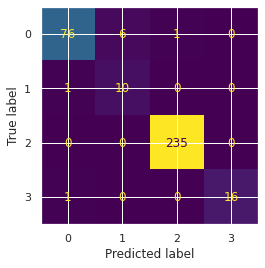

In [19]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_Gini, colorbar = False)

In [20]:
y_train_pred_Gini = DT_classifier_Gini.predict(x_train)
print('Accuracy of train data: ', accuracy_score(y_train, y_train_pred_Gini))
print('Accuracy of test data: ', accuracy_score(y_test, y_pred_Gini))

Accuracy of train data:  1.0
Accuracy of test data:  0.9739884393063584


In [21]:
print(classification_report(y_test, y_pred_Gini))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94        83
           1       0.62      0.91      0.74        11
           2       1.00      1.00      1.00       235
           3       1.00      0.94      0.97        17

    accuracy                           0.97       346
   macro avg       0.90      0.94      0.91       346
weighted avg       0.98      0.97      0.98       346



## kNN Classifier

In [22]:
from sklearn.neighbors import KNeighborsClassifier
kNN_classifier = KNeighborsClassifier()
kNN_classifier.fit(x_train, y_train)
y_pred_kNN = kNN_classifier.predict(x_test)

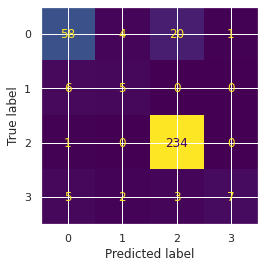

In [23]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_kNN, colorbar = False)

In [24]:
y_train_pred_kNN = kNN_classifier.predict(x_train)
print('Accuracy of train data: ', accuracy_score(y_train, y_train_pred_kNN))
print('Accuracy of test data: ', accuracy_score(y_test, y_pred_kNN))

Accuracy of train data:  0.9580318379160637
Accuracy of test data:  0.8786127167630058


In [25]:
print(classification_report(y_test, y_pred_kNN))

              precision    recall  f1-score   support

           0       0.83      0.70      0.76        83
           1       0.45      0.45      0.45        11
           2       0.91      1.00      0.95       235
           3       0.88      0.41      0.56        17

    accuracy                           0.88       346
   macro avg       0.77      0.64      0.68       346
weighted avg       0.87      0.88      0.87       346



## Naive Bayes

In [26]:
from sklearn.naive_bayes import MultinomialNB
Bayes = MultinomialNB()
Bayes.fit(x_train, y_train)
Bayes.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

In [27]:
y_pred_Bayes = Bayes.predict(x_test)

In [28]:
print('Training accuracy: ', Bayes.score(x_train, y_train))
print('Testing accuracy: ', accuracy_score(y_test, y_pred_Bayes))

Training accuracy:  0.7076700434153401
Testing accuracy:  0.684971098265896


In [29]:
print(classification_report(y_test, y_pred_Bayes))

              precision    recall  f1-score   support

           0       1.00      0.02      0.05        83
           1       0.00      0.00      0.00        11
           2       0.68      1.00      0.81       235
           3       0.00      0.00      0.00        17

    accuracy                           0.68       346
   macro avg       0.42      0.26      0.21       346
weighted avg       0.70      0.68      0.56       346



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


There is a warning that basically states that certain predictions have not been made. Specifically:

In [30]:
set(y_test) - set(y_pred_Bayes)

{1, 3}

We can suppress the warining by specifying that we would like to have only the predictions for which the labels are available:

In [31]:
print(classification_report(y_test, y_pred_Bayes, labels=np.unique(y_pred_Bayes)))

              precision    recall  f1-score   support

           0       1.00      0.02      0.05        83
           2       0.68      1.00      0.81       235

   micro avg       0.68      0.75      0.71       318
   macro avg       0.84      0.51      0.43       318
weighted avg       0.77      0.75      0.61       318



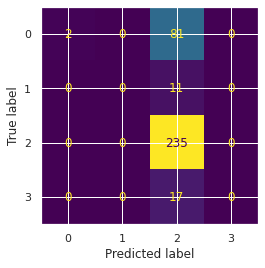

In [32]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_Bayes, colorbar = False)

## SVM

In [33]:
from sklearn.svm import SVC
support_vector = SVC()
support_vector.fit(x_train, y_train)
support_vector.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [34]:
y_pred_svm = support_vector.predict(x_test)
print('Training accuracy: ', support_vector.score(x_train, y_train))
print('Testing accuracy: ', accuracy_score(y_test, y_pred_svm))

Training accuracy:  0.9290882778581766
Testing accuracy:  0.9132947976878613


In [35]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.88      0.76      0.81        83
           1       1.00      0.45      0.62        11
           2       0.92      0.99      0.95       235
           3       0.94      0.88      0.91        17

    accuracy                           0.91       346
   macro avg       0.93      0.77      0.83       346
weighted avg       0.91      0.91      0.91       346



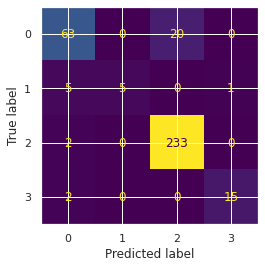

In [36]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm, colorbar = False)

## Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
Logistic_Classifier = LogisticRegression()
Logistic_Classifier.fit(x_train, y_train)
Logistic_Classifier.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [38]:
y_pred_LRC = Logistic_Classifier.predict(x_test)

In [39]:
print('Training accuracy: ', Logistic_Classifier.score(x_train, y_train))
print('Testing accuracy: ', accuracy_score(y_test, y_pred_LRC))

Training accuracy:  0.703328509406657
Testing accuracy:  0.6589595375722543


As in the case of kNN, we also get a warning here, which we suppress:

In [40]:
print(classification_report(y_test, y_pred_LRC, labels=np.unique(y_pred_LRC)))

              precision    recall  f1-score   support

           0       0.26      0.13      0.18        83
           2       0.72      0.92      0.81       235
           3       0.00      0.00      0.00        17

   micro avg       0.66      0.68      0.67       335
   macro avg       0.33      0.35      0.33       335
weighted avg       0.57      0.68      0.61       335



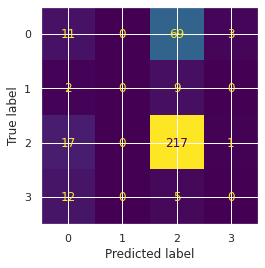

In [41]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_LRC, colorbar = False)

## Random Forests

In [42]:
from sklearn.ensemble import RandomForestClassifier
RF_classifier = RandomForestClassifier()
RF_classifier.fit(x_train, y_train)
RF_classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [43]:
y_pred_RF = RF_classifier.predict(x_test)
y_train_pred_RF = RF_classifier.predict(x_train)
print('Accuracy Score of Training set: ', accuracy_score(y_train, y_train_pred_RF))
print('Accuracy of the Testing Set: ', accuracy_score(y_test, y_pred_RF))

Accuracy Score of Training set:  1.0
Accuracy of the Testing Set:  0.9710982658959537


In [44]:
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94        83
           1       0.61      1.00      0.76        11
           2       0.99      1.00      1.00       235
           3       1.00      0.94      0.97        17

    accuracy                           0.97       346
   macro avg       0.90      0.96      0.92       346
weighted avg       0.98      0.97      0.97       346



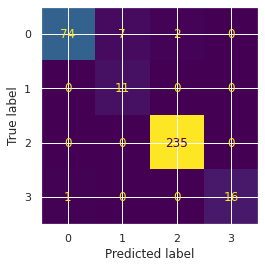

In [45]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_RF, colorbar = False)

## Accuracy

In [46]:
print('Accuracy Decision Tree: ', accuracy_score(y_test, y_pred_DT))
print('Accuracy kNN: ', accuracy_score(y_test, y_pred_kNN))
print('Accuracy Naive Bayes: ', accuracy_score(y_test, y_pred_Bayes))
print('Accuracy SVM: ', accuracy_score(y_test, y_pred_svm))
print('Accuracy Logistic Regression: ', accuracy_score(y_test, y_pred_LRC))
print('Accuracy Random Forest: ', accuracy_score(y_test, y_pred_RF))

Accuracy Decision Tree:  0.9739884393063584
Accuracy kNN:  0.8786127167630058
Accuracy Naive Bayes:  0.684971098265896
Accuracy SVM:  0.9132947976878613
Accuracy Logistic Regression:  0.6589595375722543
Accuracy Random Forest:  0.9710982658959537


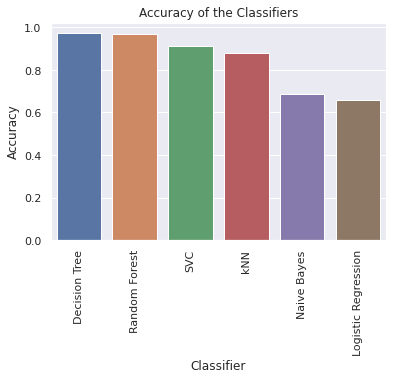

In [47]:
accuracy_df = pd.DataFrame()
accuracy_df['Classifier'] = ['Decision Tree', 'kNN', 'Naive Bayes', 'SVC', 'Logistic Regression', 'Random Forest']
accuracy_df['Accuracy'] = [accuracy_score(y_test, y_pred_DT), accuracy_score(y_test, y_pred_kNN), accuracy_score(y_test, y_pred_Bayes), 
                           accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_LRC), accuracy_score(y_test, y_pred_RF)]

sns.barplot(y = 'Accuracy', x = 'Classifier', data = accuracy_df, order = accuracy_df.sort_values('Accuracy', ascending = False).Classifier)
plt.title('Accuracy of the Classifiers')
plt.xticks(rotation=90)
plt.show()

## Conclusion

Decision Tree and Random Forest has the most accuracy, followed by SVM. Since this is an Imbalanced Dataset, it works well with the majority class but gives a poor performance with the minority class. Logistic Regression and Support Vector Machine are more sensitive toward imbalanced data and thus tend to explain the lower accuracy. However, Random Forest tackles this issue and thus may explain the higher accuracy.

# Balancing the Dataset

In [48]:
from imblearn.over_sampling import ADASYN

In [49]:
oversample = ADASYN()
X,Y = oversample.fit_resample(x,y)

In [50]:
from collections import Counter
counter = Counter(Y)
counter

Counter({2: 1210, 0: 1183, 3: 1211, 1: 1219})

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size = 0.2)
print('x_train shape: ', X_train.shape)
print('x_test shape: ', X_test.shape)
print('y_train shape: ', Y_train.shape)
print('y_test shape: ', Y_test.shape)

x_train shape:  (3858, 6)
x_test shape:  (965, 6)
y_train shape:  (3858,)
y_test shape:  (965,)


## Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier
DT_classifier_balanced = DecisionTreeClassifier()
DT_classifier_balanced.fit(X_train, Y_train)
y_pred_DT_balanced = DT_classifier_balanced.predict(X_test)

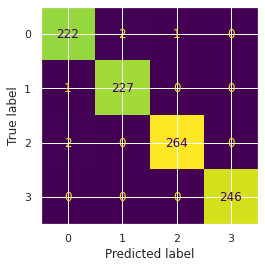

In [53]:
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_DT_balanced, colorbar = False)

In [54]:
y_train_pred_DT_balanced = DT_classifier_balanced.predict(X_train)
print('Accuracy of train data: ', accuracy_score(Y_train, y_train_pred_DT_balanced))
print('Accuracy of test data: ', accuracy_score(Y_test, y_pred_DT_balanced))

Accuracy of train data:  0.9992223950233281
Accuracy of test data:  0.9937823834196892


In [55]:
print(classification_report(Y_test, y_pred_DT_balanced))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       225
           1       0.99      1.00      0.99       228
           2       1.00      0.99      0.99       266
           3       1.00      1.00      1.00       246

    accuracy                           0.99       965
   macro avg       0.99      0.99      0.99       965
weighted avg       0.99      0.99      0.99       965



## kNN Classifier

In [56]:
from sklearn.neighbors import KNeighborsClassifier
kNN_classifier_balanced = KNeighborsClassifier()
kNN_classifier_balanced.fit(X_train, Y_train)
y_pred_kNN_balanced = kNN_classifier_balanced.predict(X_test)

In [57]:
y_train_pred_kNN_balanced = kNN_classifier_balanced.predict(X_train)
print('Accuracy of train data: ', accuracy_score(Y_train, y_train_pred_kNN_balanced))
print('Accuracy of test data: ', accuracy_score(Y_test, y_pred_kNN_balanced))

Accuracy of train data:  0.9294971487817522
Accuracy of test data:  0.8797927461139896


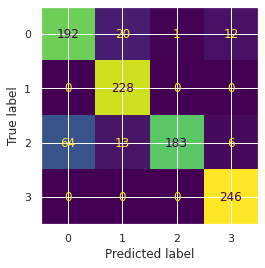

In [58]:
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_kNN_balanced, colorbar = False)

In [59]:
print(classification_report(Y_test, y_pred_kNN_balanced))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80       225
           1       0.87      1.00      0.93       228
           2       0.99      0.69      0.81       266
           3       0.93      1.00      0.96       246

    accuracy                           0.88       965
   macro avg       0.89      0.89      0.88       965
weighted avg       0.89      0.88      0.88       965



## Naive Bayes

In [60]:
from sklearn.naive_bayes import MultinomialNB
Bayes_balanced = MultinomialNB()
Bayes_balanced.fit(X_train, Y_train)
Bayes_balanced.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

In [61]:
y_pred_Bayes_balanced = Bayes_balanced.predict(X_test)
y_train_pred_Bayes_balanced = Bayes_balanced.predict(X_train)
print('Accuracy of train data: ', accuracy_score(Y_train, y_train_pred_Bayes_balanced))
print('Accuracy of test data: ', accuracy_score(Y_test, y_pred_Bayes_balanced))

Accuracy of train data:  0.5528771384136858
Accuracy of test data:  0.5626943005181347


In [62]:
print(classification_report(Y_test, y_pred_Bayes_balanced))

              precision    recall  f1-score   support

           0       0.16      0.05      0.08       225
           1       0.47      0.63      0.53       228
           2       0.64      0.54      0.58       266
           3       0.67      1.00      0.80       246

    accuracy                           0.56       965
   macro avg       0.48      0.55      0.50       965
weighted avg       0.50      0.56      0.51       965



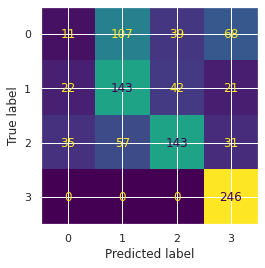

In [63]:
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_Bayes_balanced, colorbar = False)

## SVM

In [64]:
from sklearn.svm import SVC
support_vector_balanced = SVC()
support_vector_balanced.fit(X_train, Y_train)
support_vector_balanced.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [65]:
y_pred_svm_balanced = support_vector_balanced.predict(X_test)
y_train_pred_svm_balanced = support_vector_balanced.predict(X_train)
print('Accuracy of train data: ', accuracy_score(Y_train, y_train_pred_svm_balanced))
print('Accuracy of test data: ', accuracy_score(Y_test, y_pred_svm_balanced))

Accuracy of train data:  0.9847071021254536
Accuracy of test data:  0.9720207253886011


In [66]:
print(classification_report(Y_test, y_pred_svm_balanced))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       225
           1       0.98      1.00      0.99       228
           2       1.00      0.91      0.95       266
           3       1.00      1.00      1.00       246

    accuracy                           0.97       965
   macro avg       0.97      0.97      0.97       965
weighted avg       0.97      0.97      0.97       965



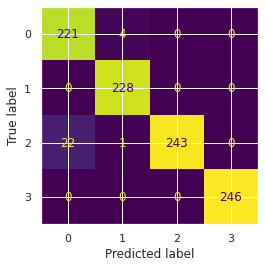

In [67]:
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_svm_balanced, colorbar = False)

## Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression
Logistic_Classifier_balanced = LogisticRegression()
Logistic_Classifier_balanced.fit(X_train, Y_train)
Logistic_Classifier_balanced.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [69]:
y_pred_LRC_balanced = Logistic_Classifier_balanced.predict(X_test)
y_train_pred_LRC_balanced = Logistic_Classifier_balanced.predict(X_train)
print('Accuracy of train data: ', accuracy_score(Y_train, y_train_pred_LRC_balanced))
print('Accuracy of test data: ', accuracy_score(Y_test, y_pred_LRC_balanced))

Accuracy of train data:  0.5539139450492483
Accuracy of test data:  0.572020725388601


The accuracy of the testing dataset is higher than the training dataset. There may be an underlying distributon that may be responsible for this, resulting from the split between train and test data. We can use cross validation:

In [70]:
from sklearn.model_selection import KFold, cross_val_score
cv = KFold(n_splits=5, random_state=42, shuffle=True)
scores = cross_val_score(Logistic_Classifier_balanced, X, Y, scoring='balanced_accuracy', cv=cv, n_jobs=-1)
print('Accuracy:', scores)

Accuracy: [0.56246337 0.56002783 0.55151689 0.51781778 0.54108484]


There does not seem to be any large differences between the cross validation sets.

In [71]:
print(classification_report(Y_test, y_pred_LRC_balanced))

              precision    recall  f1-score   support

           0       0.24      0.17      0.20       225
           1       0.50      0.55      0.53       228
           2       0.61      0.60      0.61       266
           3       0.77      0.93      0.84       246

    accuracy                           0.57       965
   macro avg       0.53      0.56      0.54       965
weighted avg       0.54      0.57      0.55       965



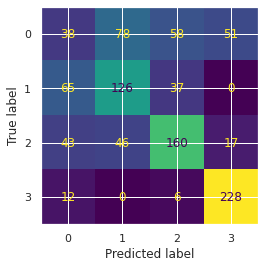

In [72]:
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_LRC_balanced, colorbar = False)

## Random Forests

In [73]:
from sklearn.ensemble import RandomForestClassifier
RF_classifier_balanced = RandomForestClassifier()
RF_classifier_balanced.fit(X_train, Y_train)
RF_classifier_balanced.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [74]:
y_pred_RF_balanced = RF_classifier_balanced.predict(X_test)
y_train_pred_RF_balanced = RF_classifier_balanced.predict(X_train)
print('Accuracy of train data: ', accuracy_score(Y_train, y_train_pred_RF_balanced))
print('Accuracy of test data: ', accuracy_score(Y_test, y_pred_RF_balanced))

Accuracy of train data:  0.9992223950233281
Accuracy of test data:  0.9875647668393782


In [75]:
print(classification_report(Y_test, y_pred_RF_balanced))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       225
           1       0.98      1.00      0.99       228
           2       1.00      0.98      0.99       266
           3       1.00      1.00      1.00       246

    accuracy                           0.99       965
   macro avg       0.99      0.99      0.99       965
weighted avg       0.99      0.99      0.99       965



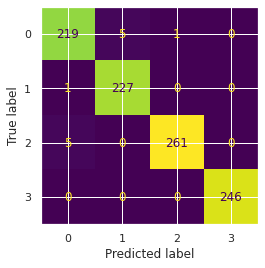

In [76]:
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_RF_balanced, colorbar = False)

## Accuracy

In [77]:
print('Accuracy Decision Tree: ', accuracy_score(Y_test, y_pred_DT_balanced))
print('Accuracy kNN: ', accuracy_score(Y_test, y_pred_kNN_balanced))
print('Accuracy Naive Bayes: ', accuracy_score(Y_test, y_pred_Bayes_balanced))
print('Accuracy SVM: ', accuracy_score(Y_test, y_pred_svm_balanced))
print('Accuracy Logistic Regression: ', accuracy_score(Y_test, y_pred_LRC_balanced))
print('Accuracy Random Forest: ', accuracy_score(Y_test, y_pred_RF_balanced))

Accuracy Decision Tree:  0.9937823834196892
Accuracy kNN:  0.8797927461139896
Accuracy Naive Bayes:  0.5626943005181347
Accuracy SVM:  0.9720207253886011
Accuracy Logistic Regression:  0.572020725388601
Accuracy Random Forest:  0.9875647668393782


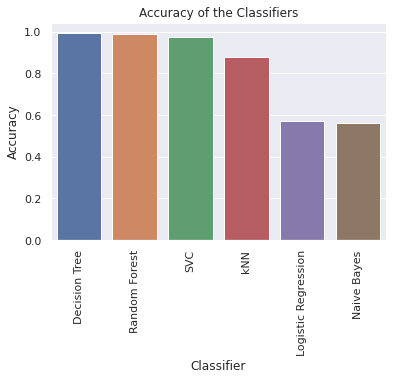

In [78]:
accuracy_df = pd.DataFrame()
accuracy_df['Classifier'] = ['Decision Tree', 'kNN', 'Naive Bayes', 'SVC', 'Logistic Regression', 'Random Forest']
accuracy_df['Accuracy'] = [accuracy_score(Y_test, y_pred_DT_balanced), accuracy_score(Y_test, y_pred_kNN_balanced), 
                           accuracy_score(Y_test, y_pred_Bayes_balanced), accuracy_score(Y_test, y_pred_svm_balanced), 
                           accuracy_score(Y_test, y_pred_LRC_balanced), accuracy_score(Y_test, y_pred_RF_balanced)]

sns.barplot(y = 'Accuracy', x = 'Classifier', data = accuracy_df, order = accuracy_df.sort_values('Accuracy', ascending = False).Classifier)
plt.title('Accuracy of the Classifiers')
plt.xticks(rotation=90)
plt.show()

## Conclusion

Decision Tree and Random Forest has the most accuracy, followed by SVM.